In [190]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import mplcyberpunk
from matplotlib.backends.backend_pdf import PdfPages

In [191]:
# plt.style.use("cyberpunk")
plt.style.use(["dark_background", "cyberpunk"])


In [192]:
pdf = PdfPages("eda.pdf")
pd.set_option('display.max_columns', 500)
fontsize = 12

In [193]:
data = pd.read_csv('table/BankChurners.csv')
data.rename(
    columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1' : 'NBC_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2' : 'NBC_2'},
             inplace=True
)

In [194]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBC_1,NBC_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [195]:
data.iloc[:, :11].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLIENTNUM                 10127 non-null  int64 
 1   Attrition_Flag            10127 non-null  object
 2   Customer_Age              10127 non-null  int64 
 3   Gender                    10127 non-null  object
 4   Dependent_count           10127 non-null  int64 
 5   Education_Level           10127 non-null  object
 6   Marital_Status            10127 non-null  object
 7   Income_Category           10127 non-null  object
 8   Card_Category             10127 non-null  object
 9   Months_on_book            10127 non-null  int64 
 10  Total_Relationship_Count  10127 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 870.4+ KB


In [196]:
data.iloc[:, 11:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Months_Inactive_12_mon  10127 non-null  int64  
 1   Contacts_Count_12_mon   10127 non-null  int64  
 2   Credit_Limit            10127 non-null  float64
 3   Total_Revolving_Bal     10127 non-null  int64  
 4   Avg_Open_To_Buy         10127 non-null  float64
 5   Total_Amt_Chng_Q4_Q1    10127 non-null  float64
 6   Total_Trans_Amt         10127 non-null  int64  
 7   Total_Trans_Ct          10127 non-null  int64  
 8   Total_Ct_Chng_Q4_Q1     10127 non-null  float64
 9   Avg_Utilization_Ratio   10127 non-null  float64
 10  NBC_1                   10127 non-null  float64
 11  NBC_2                   10127 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 949.5 KB


In [197]:
data.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBC_1,NBC_2
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


In [198]:
len(data['CLIENTNUM'].unique().tolist())

10127

In [199]:
total_revolting = data.groupby('Months_on_book')['Total_Revolving_Bal'].agg('mean')
months = total_revolting.index
total = total_revolting.values
total_max = round(max(total))
total_min = round(min(total))


In [200]:
text = f"Зависимость не монотонная.\n Минимум оборота приходится на 51 месяц = {total_min}$,\n максимум на 53 месяц = {total_max}$.\n С 15 по 50 месяц объем примерно на 1150$"

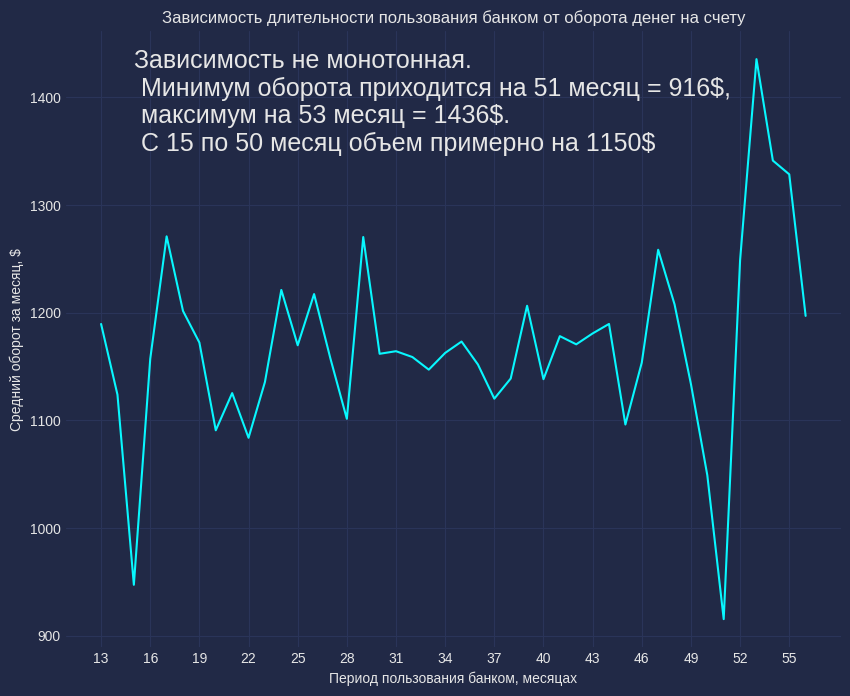

In [201]:
figure = plt.figure(figsize=(10,8))
plt.plot(months,total)
plt.xlabel("Период пользования банком, месяцах")
plt.ylabel("Средний оборот за месяц, $")
plt.xticks(np.arange(min(months), max(months), 3))
plt.grid(True)
plt.title("Зависимость длительности пользования банком от оборота денег на счету")
plt.text(15, 1350, text, fontsize=18)
plt.show()
pdf.savefig(figure)


In [202]:
gender_user = data.groupby('Gender')['Total_Trans_Amt'].agg('mean')
genders = gender_user.index
values_total = gender_user.values
text = f"Видим, что средние транзакции \n за год от пола \nпрактически не зависят"

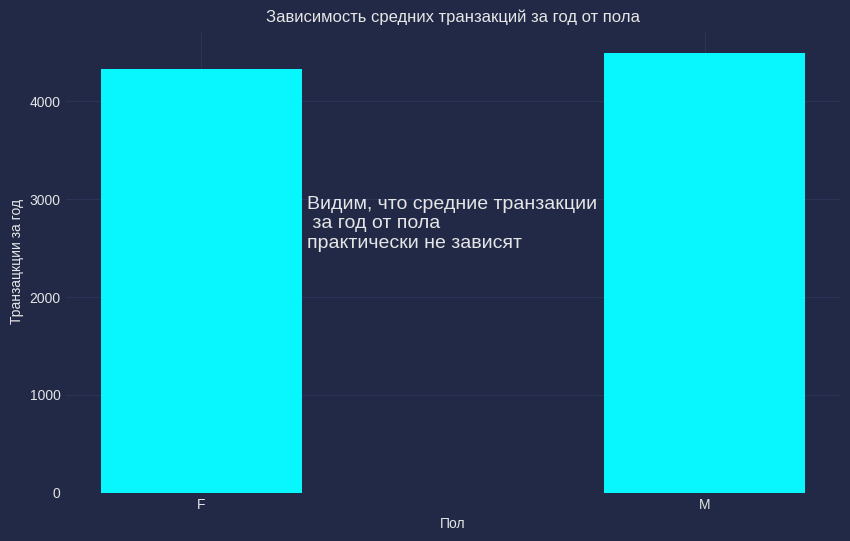

In [203]:
figure = plt.figure(figsize=(10, 6))
plt.bar(genders, values_total, width=0.4)
plt.xlabel("Пол")
plt.ylabel("Транзацкции за год")
plt.title("Зависимость средних транзакций за год от пола")
plt.text(0.21, 2500, text, fontsize=14)
plt.show()
pdf.savefig(figure)

In [204]:
value_age = data['Customer_Age'].value_counts()

mean = round(data['Customer_Age'].mean(),2)
mode = data['Customer_Age'].mode()[0]
std = round(data['Customer_Age'].std(), 2)


In [205]:
text = f"Видим, что распределение\n пользователей по возрасту\n похоже на нормальное\n c mean={mean}, std={std}\n Также заметим,\n что мода приходится\n на {mode} года "

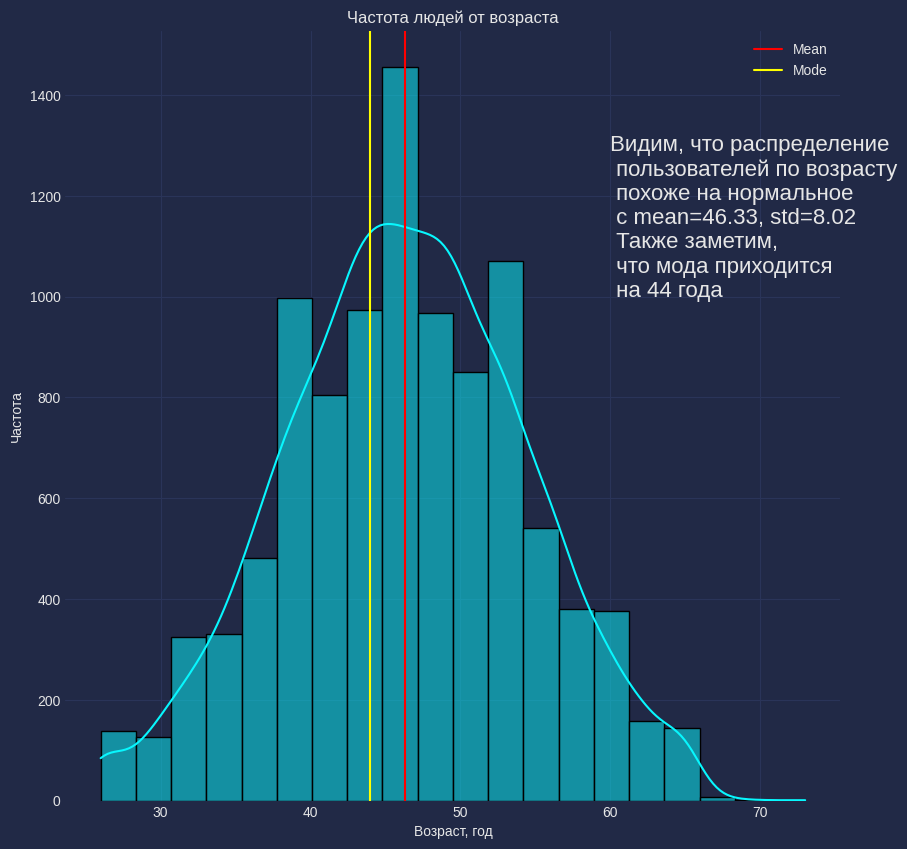

In [206]:
figure = plt.figure(figsize=(10,10))
sns.histplot(data['Customer_Age'], bins=20, edgecolor='black', kde=True)
plt.xlabel("Возраст, год")
plt.ylabel("Частота")
plt.title("Частота людей от возраста")
plt.axvline(mean, ymin=0, ymax=1400, color='red', label='Mean')
plt.axvline(mode, ymin=0, ymax=1400, color='yellow', label='Mode')
plt.legend()
plt.text(60, 1000, text, fontsize=16)
plt.show()
pdf.savefig(figure)

In [207]:
median = round(data['Credit_Limit'].median())
mead = round(data['Credit_Limit'].mean())
percentile_75 = np.percentile(data['Credit_Limit'], 75)
count = len([num for num in data['Credit_Limit'] if num > percentile_75])
text = f"Медиана приходтися на {median}\n Среднее значение {mean}\n Есть много значений за усом\n 75 перцентиля ~ {count},\n которые больше 24000$"

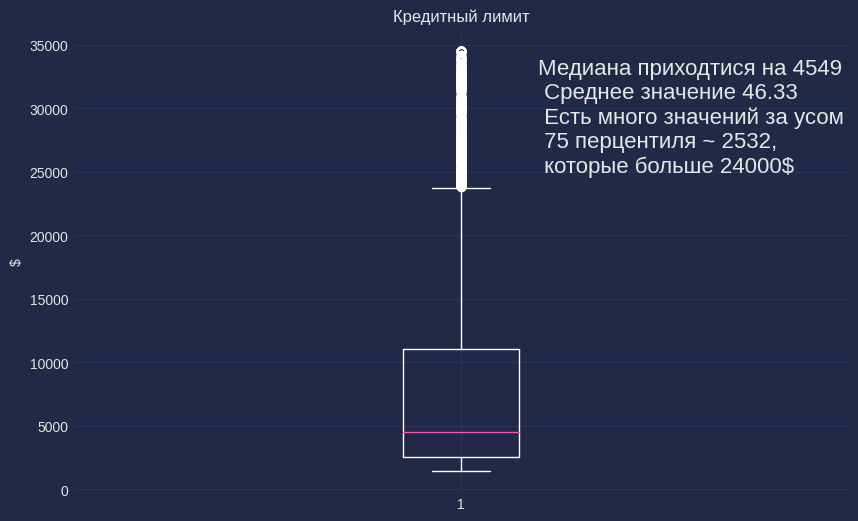

In [208]:
figure = plt.figure(figsize=(10,6))
plt.boxplot(data['Credit_Limit'], vert=True)
plt.title("Кредитный лимит")
plt.ylabel("$")
plt.text(1.1, 25000, text, fontsize=16)
plt.show()
pdf.savefig(figure)

In [209]:
data.columns.to_list()

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'NBC_1',
 'NBC_2']

In [210]:
features = ['Credit_Limit', 'Avg_Open_To_Buy','Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

In [211]:
heatmap = data[features]
mask = np.triu(heatmap.corr())

text = f"Кредитный лимит и доступные деньги\n для покупки по кредиту\n являются одним и тем же,\n так как корреляция равна 1\n Количество покупок и общая сумма,\n также сильно коррелированы"

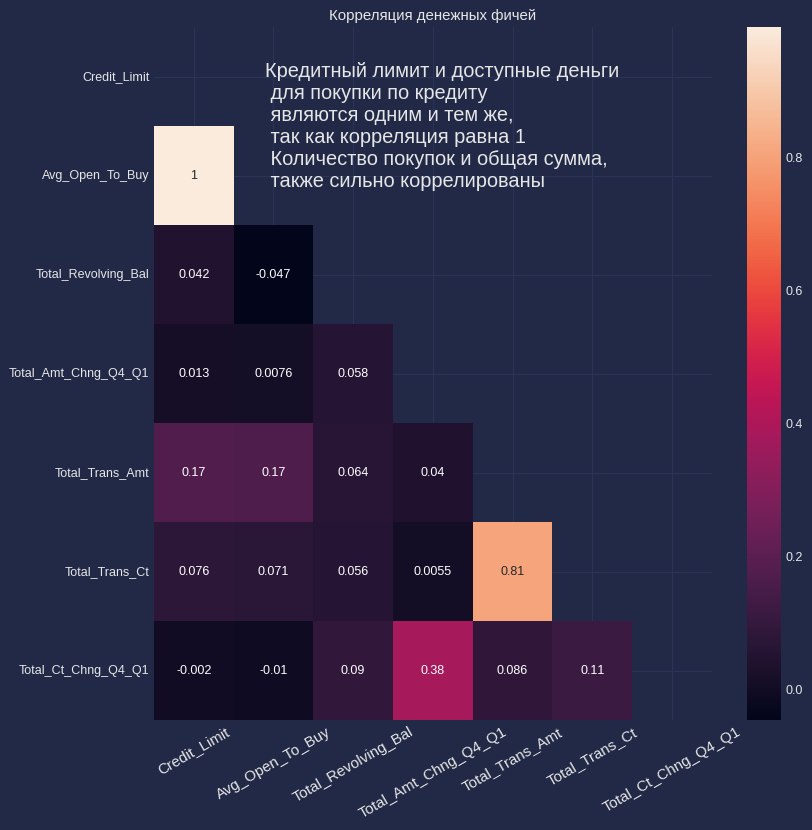

In [212]:
figure = plt.figure(figsize=(10, 10), dpi=90)
sns.heatmap(heatmap.corr(), mask=mask, xticklabels=features, yticklabels=features, annot=True)

plt.title("Корреляция денежных фичей")
plt.xticks(fontsize=12, rotation=30)
plt.text(0.2, 0.95, text, transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=16)
plt.show()
pdf.savefig(figure)

In [213]:
categories, category_counts = np.unique(data['Income_Category'], return_counts=True)
text = f"В основном клиенты делятся на 6 категорий, \nно большая доля приходится на клиентов с доходом в $40k и меньше"

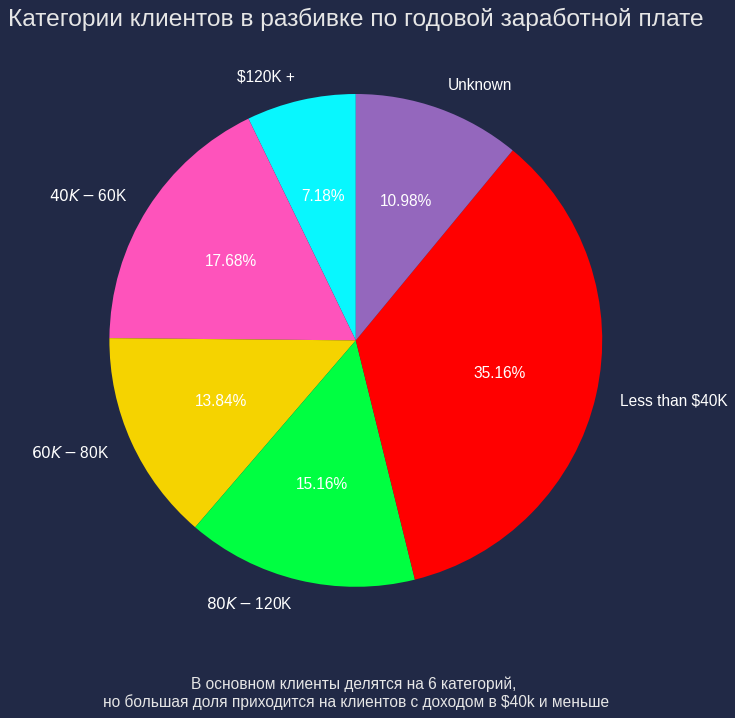

In [214]:
figure = plt.figure(figsize=(12,10), dpi= 80)

plt.title('Категории клиентов в разбивке по годовой заработной плате', fontsize=22)
plt.pie(category_counts, labels=categories, autopct='%1.2f%%', startangle=90, textprops={'color' : 'white', 'fontsize' : 14})
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.text(0.5, -0.1, text, transform=plt.gca().transAxes,
         verticalalignment='bottom', horizontalalignment='center', fontsize=14)
plt.show()
pdf.savefig(figure)

In [215]:
data['Marital_Status'].unique()
text = f"Большая доля на количество транзакций\n выходит на замужных пользователей\n Но для различных категорий\n в целом образуется нормальное распределение"

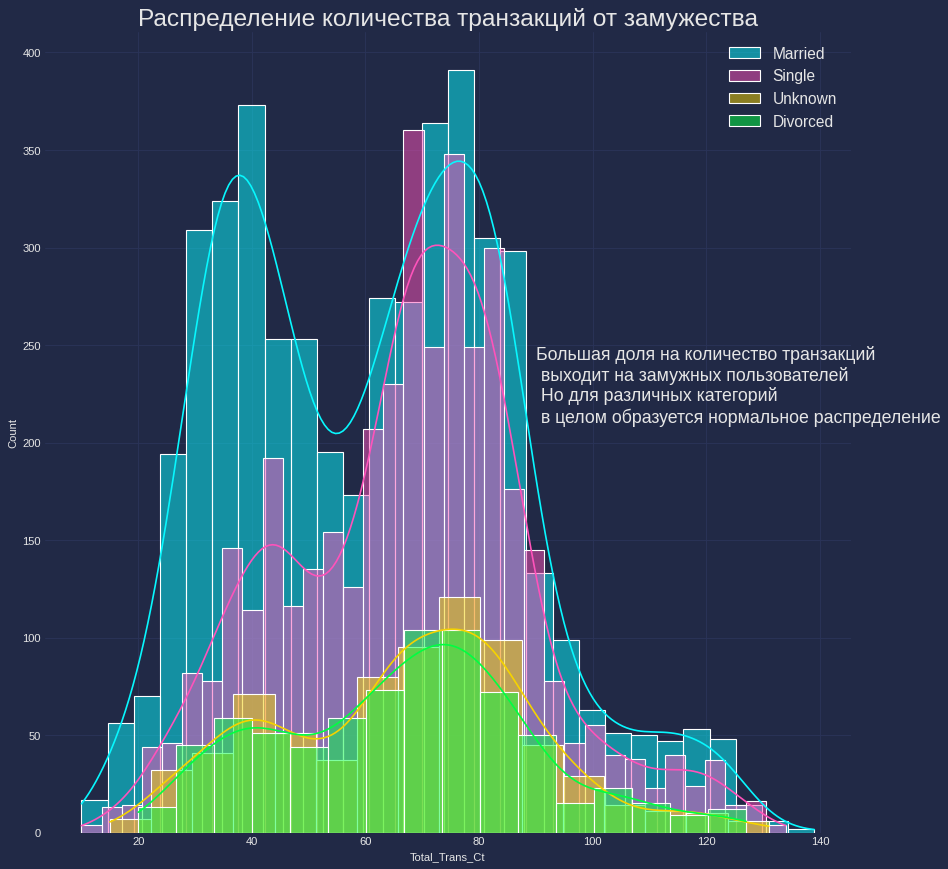

In [216]:
figure = plt.figure(figsize=(13,13), dpi= 80)
sns.histplot(data.loc[data['Marital_Status'] == 'Married', "Total_Trans_Ct"], label="Married", kde=True)
sns.histplot(data.loc[data['Marital_Status'] == 'Single', "Total_Trans_Ct"], label="Single", kde=True)
sns.histplot(data.loc[data['Marital_Status'] == 'Unknown', "Total_Trans_Ct"], label="Unknown", kde=True)
sns.histplot(data.loc[data['Marital_Status'] == 'Divorced', "Total_Trans_Ct"], label="Divorced", kde=True)
plt.title('Распределение количества транзакций от замужества', fontsize=22)
plt.legend(fontsize=14)
plt.text(90, 250, text, verticalalignment='top', horizontalalignment='left', fontsize=16)
plt.show()
pdf.savefig(figure)

In [217]:
pdf.close()